In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [2]:
# importing data and storing it into a variable "titanic_data"

titanic_data = pd.read_csv('Titanic_dataset.csv', index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,NaN,7.9250,NaN,S
4,1,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [3]:
titanic_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.00,NaN,S
888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,B42,S
889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C148,C
891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,NaN,Q


In [4]:
titanic_data.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
689,0,3.0,"Fischer, Mr. Eberhard Thelander",male,18.0,0.0,0.0,350036,7.7958,NaN,S
787,1,3.0,"Sjoblom, Miss. Anna Sofia",female,18.0,0.0,0.0,3101265,7.4958,NaN,S
163,0,3.0,"Bengtsson, Mr. John Viktor",male,26.0,0.0,0.0,347068,7.7750,NaN,S


In [5]:
# Data Dictionary
# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
# checking the number of varibles and rows of the dataset
titanic_data.shape

(891, 11)

In [7]:
#  the variables of the Titanic dataset
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    888 non-null    float64
 2   Name      884 non-null    object 
 3   Sex       886 non-null    object 
 4   Age       713 non-null    float64
 5   SibSp     890 non-null    float64
 6   Parch     890 non-null    float64
 7   Ticket    887 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 83.5+ KB


In [9]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,888.000000,713.000000,890.000000,890.000000,889.000000
mean,0.383838,2.310811,29.712721,0.523596,0.382022,32.208019
std,0.486592,0.834850,14.532143,1.103224,0.806409,49.749014
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# suming the number of Nan's in each of the variables if any
titanic_data.isna().sum()

Survived      0
Pclass        3
Name          7
Sex           5
Age         178
SibSp         1
Parch         1
Ticket        4
Fare          2
Cabin       687
Embarked      2
dtype: int64

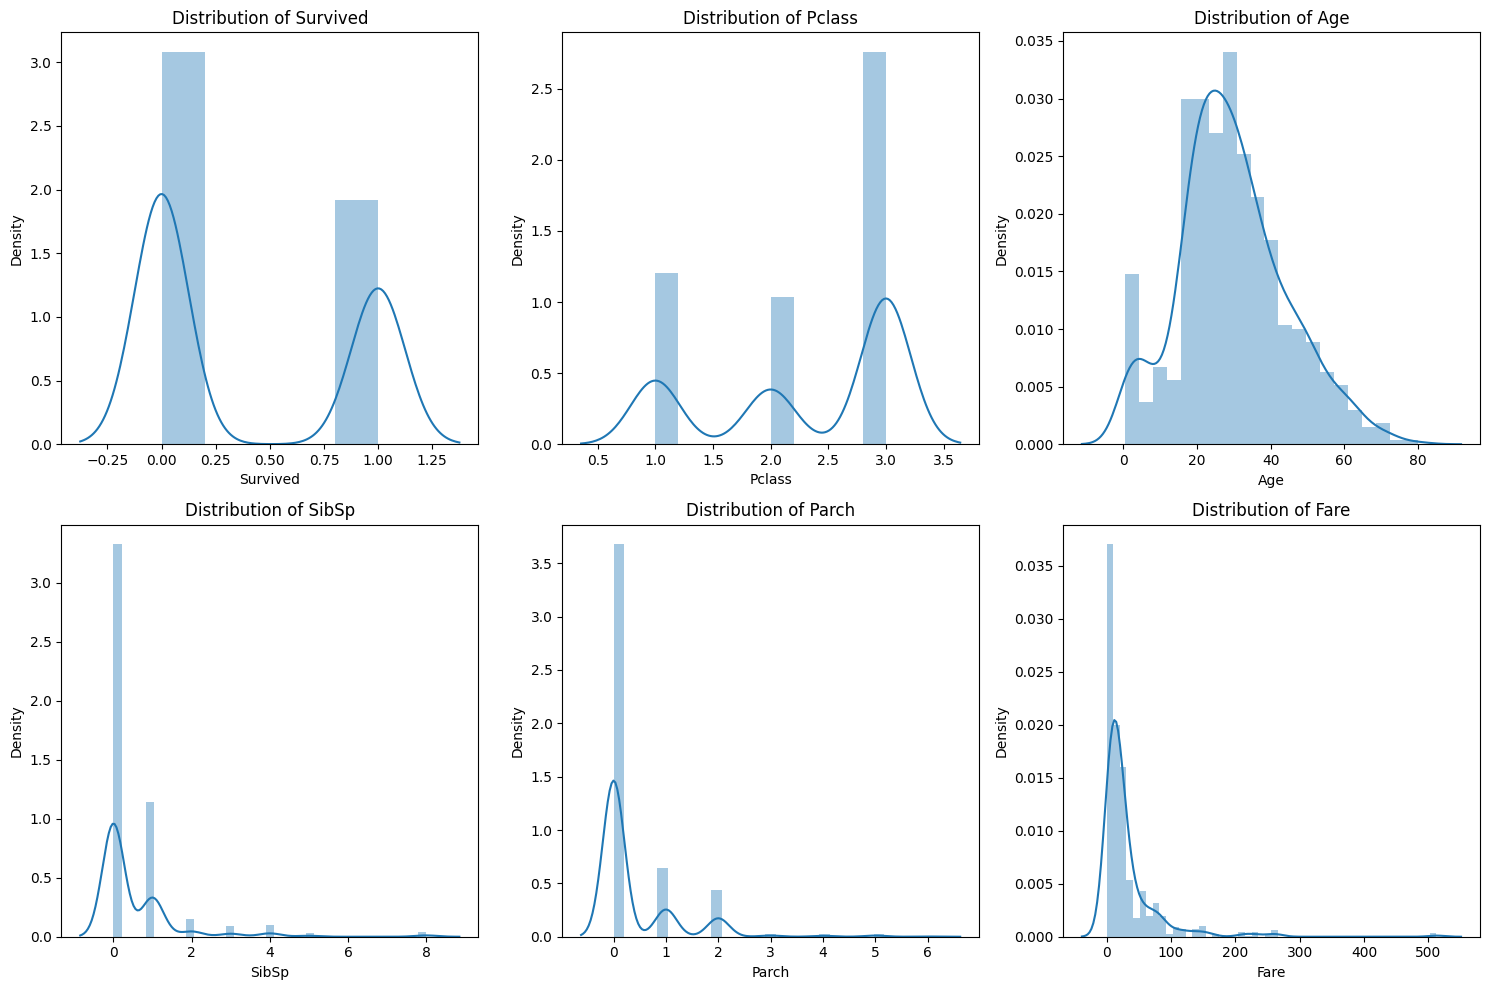

In [11]:
# Count plot to dhow the number of observationsin each categorical bin unisng bars

def plot_distibution(dataset):
    # Filter out non-numeric columns
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns

    # Calculate the number of columns and rows for the subplot grid
    num_cols = len(numeric_columns)  # Number of columns in the dataset
    num_rows = (num_cols - 1) // 3 + 1  # Number of rows needed based on 3 columns per row

    # Create the subplot grid with specified number of rows and columns, and figure size
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array to iterate over each subplot

    # Iterate over each column in the dataset and plot the distribution
    for i, column in enumerate(numeric_columns):
        # Plot the distribution using Seaborn's distplot on the current subplot
        sns.distplot(dataset[column], ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")  # Set the subplot title
        axes[i].set_xlabel(column)  # Set the x-axis label
        axes[i].set_ylabel("Density")  # Set the y-axis label

    plt.tight_layout()  # Improve spacing between subplots
    plt.show()  # Display the figure


plot_distibution(titanic_data)

In [12]:
titanic_data['Survived'].median()

0.0

In [13]:
set(titanic_data['Survived'])

{0, 1}

In [14]:
titanic_data['Age'].median()

28.0

In [15]:
titanic_data[['Age']].value_counts()

Age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64

In [16]:
# Now lets try and fix the Nan's in the dataset

nan_variables = [col for col in titanic_data.columns if titanic_data[col].isna().any()]
nan_variables

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [17]:
set(titanic_data['Pclass'])

{1.0, 2.0, 3.0, nan, nan, nan}

In [18]:
titanic_data['Pclass'] = titanic_data['Pclass'].fillna(titanic_data['Pclass'].median())
set(titanic_data['Pclass'])

{1.0, 2.0, 3.0}

In [19]:
def drop_records_with_nan(data, column):
    # Dropping records with NaN values in the specified column
    cleaned_data = data.dropna(subset=[column])
    
    return cleaned_data[column]


# Name varible is Non-numeric, and can be replaced with any of the statistical means, so lets drop them

# drop_records_with_nan(titanic_data, 'Name').isna().sum()

In [20]:
titanic_data.drop('Name', axis='columns', inplace=True)

In [21]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3.0,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,1,1.0,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,1,3.0,female,26.0,0.0,0.0,NaN,7.9250,NaN,S
4,1,3.0,female,35.0,1.0,0.0,113803,53.1000,C123,S
5,0,3.0,male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [22]:
nan_variables = [col for col in titanic_data.columns if titanic_data[col].isna().any()]
nan_variables

['Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [23]:
titanic_data[['Ticket', 'Age']]

,Ticket,Age
PassengerId,,
1,A/5 21171,22.0
2,PC 17599,38.0
3,NaN,26.0
4,113803,35.0
5,373450,35.0
...,...,...
887,211536,27.0
888,112053,19.0
889,W./C. 6607,NaN


In [26]:
type(titanic_data['Ticket'])

pandas.core.series.Series